 MACHINE LEARNING PROJECT

 TOPIC : **Logistic Regression**
***



In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split as tts
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report, accuracy_score,precision_score,recall_score,f1_score
import statsmodels.api as sm
import statsmodels.formula.api as smf

<h3>About the dataset:</h3><br>
<b><i>Weekly: </i></b>The dataset is about the weekly percentage returns for the S&P 500 stock index between 1990 and 2010. It is a data frame with 1089 observations on the following 9 variables.<br><br>
<i>Columns in the dataset: </i>

<ul>
    <li>Year: The year that the observation was recorded</li>
    <li>Lag1: Percentage return for previous week</li>
    <li>Lag2: Percentage return for 2 weeks previous</li>
    <li>Lag3: Percentage return for 3 weeks previous</li>
    <li>Lag4: Percentage return for 4 weeks previous</li>
    <li>Lag5: Percentage return for 5 weeks previous</li>
    <li>Volume: Volume of shares traded (average number of daily shares traded in billions)</li>
    <li>Today: Percentage return for this week</li>
    <li>Direction: A factor with levels Down and Up indicating whether the market had a positive or negative return on a given week</li>
</ul>

In [ ]:
#Loading the Weekly dataset
Weekly=pd.read_csv("/content/Weekly (2).csv")
Weekly.head()

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today,Direction
0,1990,0.816,1.572,-3.936,-0.229,-3.484,0.154976,-0.270,Down
1,1990,-0.270,0.816,1.572,-3.936,-0.229,0.148574,-2.576,Down
2,1990,-2.576,-0.270,0.816,1.572,-3.936,0.159837,3.514,Up
3,1990,3.514,-2.576,-0.270,0.816,1.572,0.161630,0.712,Up
4,1990,0.712,3.514,-2.576,-0.270,0.816,0.153728,1.178,Up


<h3>Exploratory Data Analysis</h3>

In [ ]:
#Checking for null values
Weekly.isna().sum().sum()

0

There are no null values in the dataset.

In [ ]:
#Shape of the data
print("No. of rows: ",Weekly.shape[0],"\n""No. of columns: ",Weekly.shape[1])

No. of rows:  1089 
No. of columns:  9


######The dataset contains 1089 rows and 9 columns.

In [ ]:
Weekly.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1089 entries, 0 to 1088
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Year       1089 non-null   int64  
 1   Lag1       1089 non-null   float64
 2   Lag2       1089 non-null   float64
 3   Lag3       1089 non-null   float64
 4   Lag4       1089 non-null   float64
 5   Lag5       1089 non-null   float64
 6   Volume     1089 non-null   float64
 7   Today      1089 non-null   float64
 8   Direction  1089 non-null   object 
dtypes: float64(7), int64(1), object(1)
memory usage: 76.7+ KB


######The dataset consists of 1089 entries. The columns 'Year' and 'Direction' are of type int64 and object, respectively, while the rest of the columns are of type float64.

In [ ]:
#Numerical summary of the dataset
Weekly.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,1089.0,2000.048669,6.033182,1990.000000,1995.000000,2000.00000,2005.000000,2010.000000
Lag1,1089.0,0.150585,2.357013,-18.195000,-1.154000,0.24100,1.405000,12.026000
Lag2,1089.0,0.151079,2.357254,-18.195000,-1.154000,0.24100,1.409000,12.026000
Lag3,1089.0,0.147205,2.360502,-18.195000,-1.158000,0.24100,1.409000,12.026000
Lag4,1089.0,0.145818,2.360279,-18.195000,-1.158000,0.23800,1.409000,12.026000
Lag5,1089.0,0.139893,2.361285,-18.195000,-1.166000,0.23400,1.405000,12.026000
Volume,1089.0,1.574618,1.686636,0.087465,0.332022,1.00268,2.053727,9.328214
Today,1089.0,0.149899,2.356927,-18.195000,-1.154000,0.24100,1.405000,12.026000


###### The numerical summary provides statistics for each column in the dataset, including count, mean, standard deviation, min, max, and quartile values.

In [ ]:
Weekly["Direction"].value_counts()

Up      605
Down    484
Name: Direction, dtype: int64

###### There are 605 'Up' values and 484 'Down' values in the 'Direction' column.


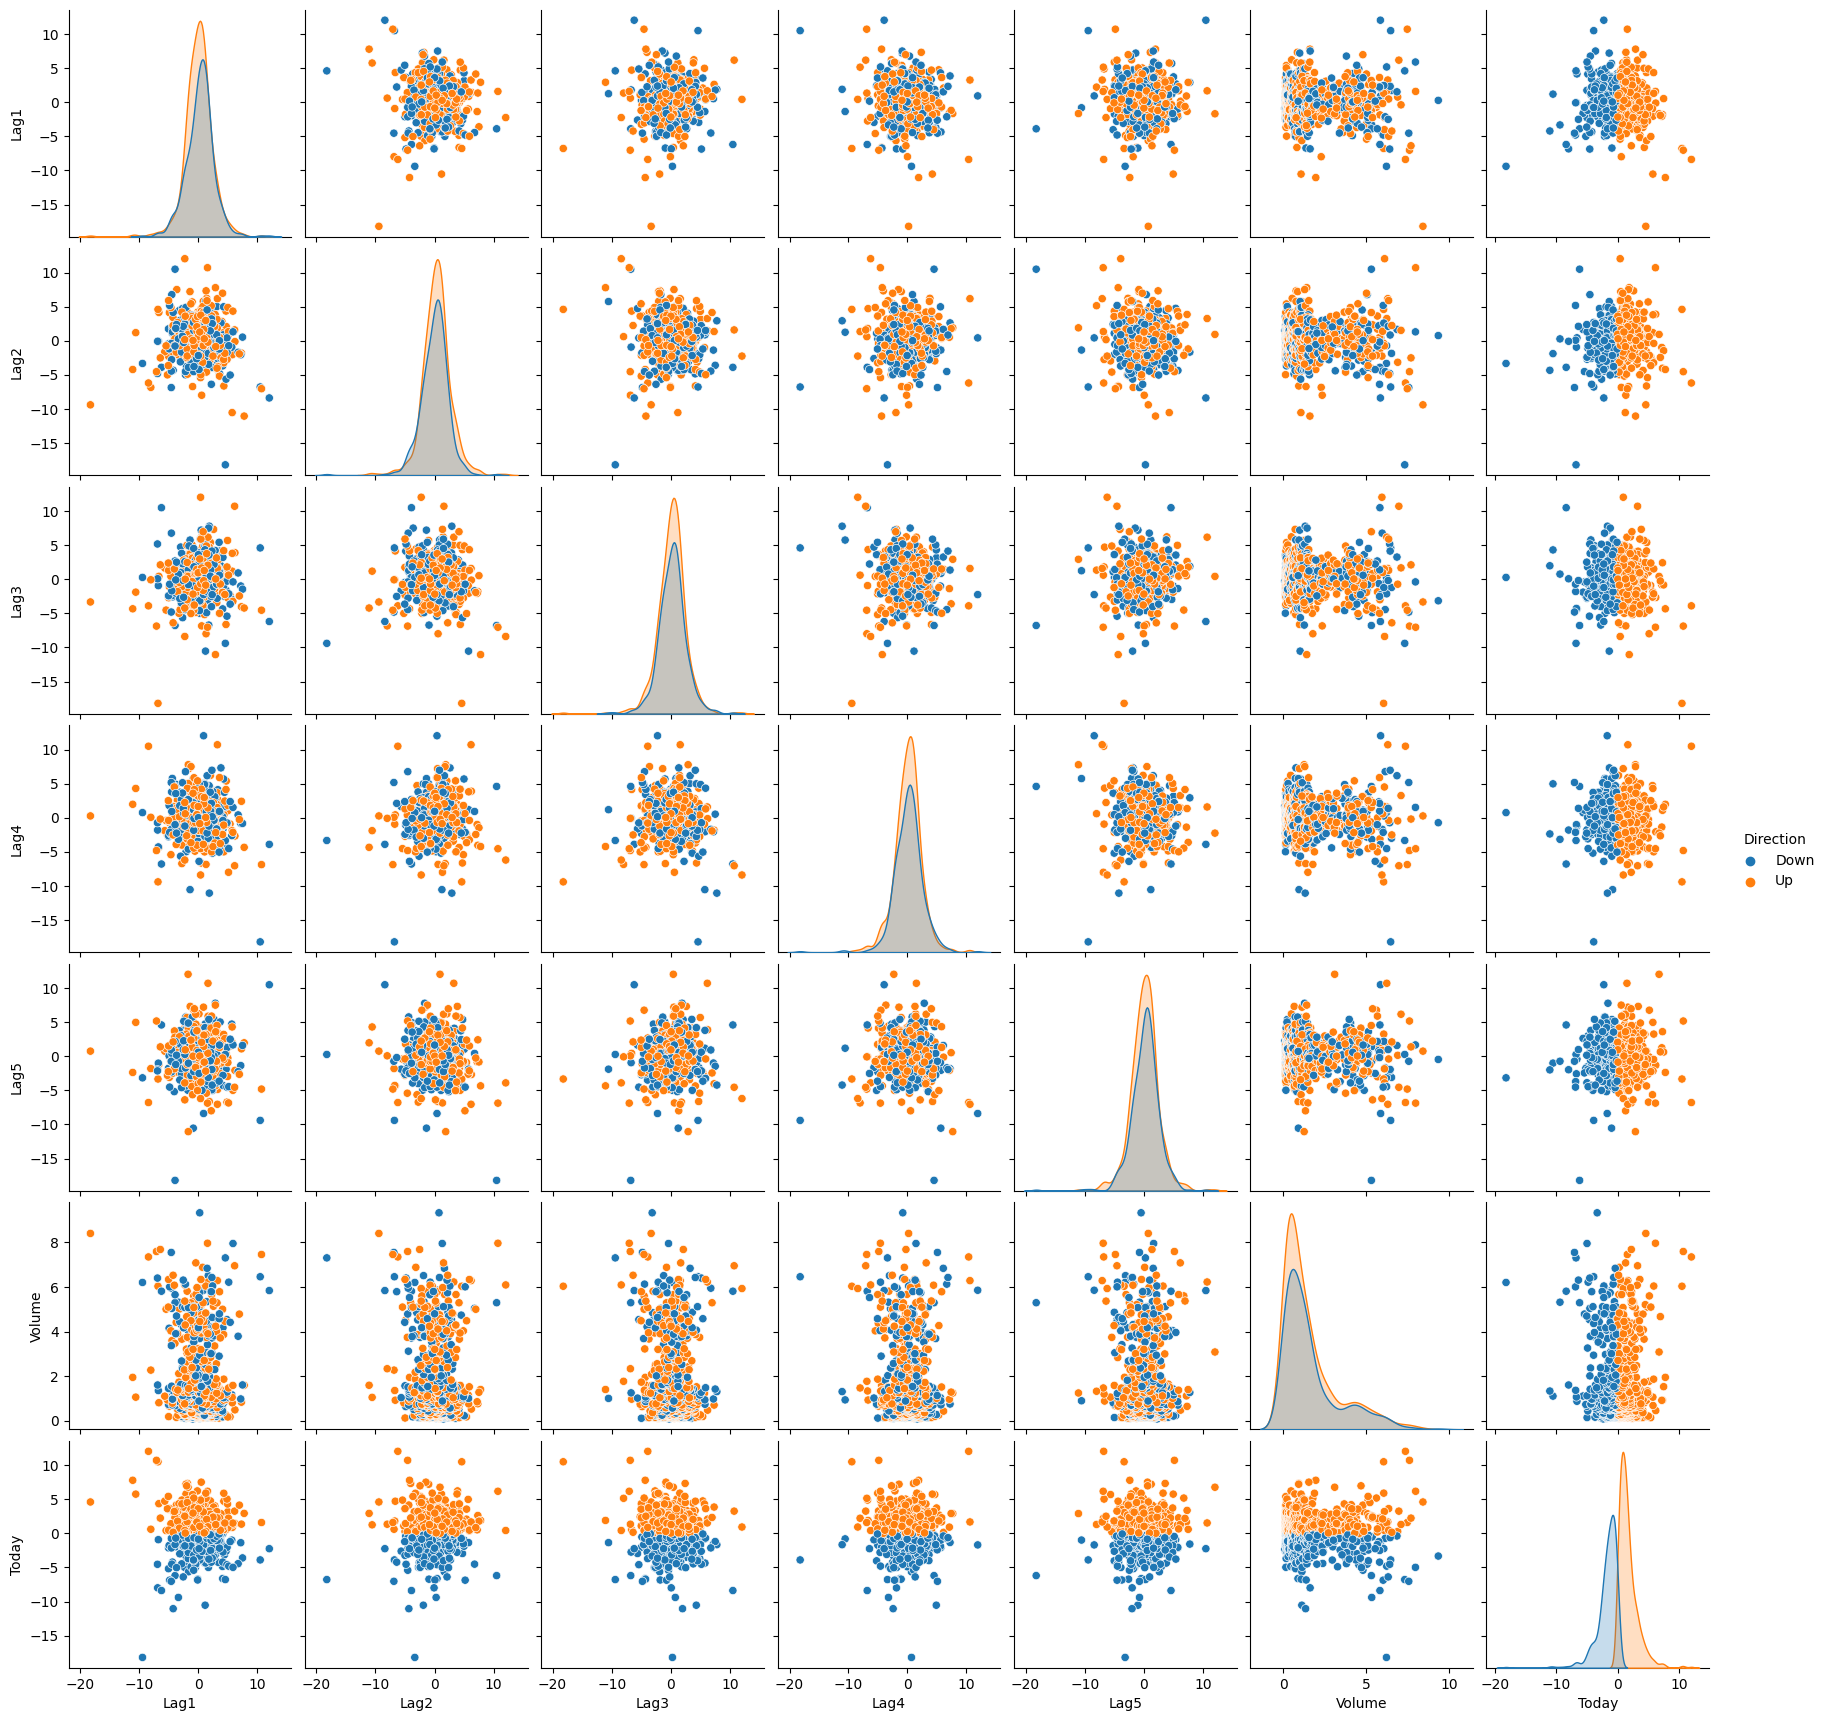

In [ ]:
#Graphical summary of the dataset
sns.pairplot(Weekly, vars=['Lag1', 'Lag2', 'Lag3', 'Lag4', 'Lag5', 'Volume','Today'], hue='Direction')

###### The pairplot provides visualizations of the relationships between the variables 'Lag1', 'Lag2', 'Lag3', 'Lag4', 'Lag5', and 'Volume' with respect to the 'Direction'.

<b><i>Interpretation:</i></b> From the above numerical and graphical summeries, we can observe from the scatterplot of just volume over time, that the number of shares traded each week has grown exponentially over the 21 years covered by the data.

The pairplot provides a graphical summary of the relationships between different pairs of variables, specifically 'Lag1', 'Lag2', 'Lag3', 'Lag4', 'Lag5', and 'Volume', with respect to the 'Direction' of the market. By examining the pairplot, we can observe the general patterns and trends in the data, especially how each variable relates to the market direction.



Orange dots: These represent the upward direction of the market in a specific week lag. When there are more orange dots in relation to a particular variable (such as 'Lag1', 'Lag2', 'Lag3', 'Lag4', 'Lag5', or 'Volume'), it suggests a positive correlation between that variable and an upward movement in the market direction for the corresponding lag week.

Blue dots: These represent the downward direction of the market in a specific week lag. When there are more blue dots in relation to a particular variable, it indicates a negative correlation between that variable and a downward movement in the market direction for the corresponding lag week.

By analyzing the color distribution and density of dots in the pairplot, one can gain insights into the potential relationships between the variables and the market direction for each lag week.

<AxesSubplot:>

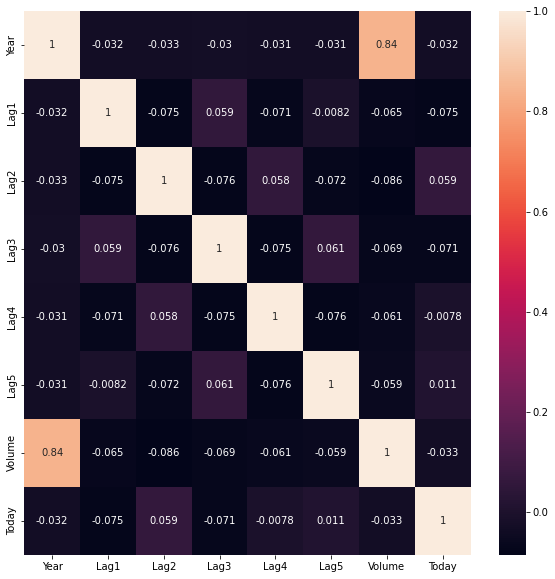

In [ ]:
#Heatmap of the correlation matrix of all the variables in the dataset.
plt.figure(figsize=(10,10))
corr_matrix = Weekly.corr()
sns.heatmap(corr_matrix, annot=True)

<b><i>Interpretation: </i></b>From the above heatmap of the correlation matrix, we can observe that :

A) Volume is strongly correlated with Today (correlation = 0.84). This means that the volume of shares traded in a given week is highly correlated with the return of the S&P 500 index in that week.

B) Volume is also strongly correlated with Lag1 (correlation = 0.65), Lag2 (correlation = 0.69), and Lag3 (correlation = 0.63). This means that the volume of shares traded in a given week is also highly correlated with the volume of shares traded in the previous three weeks.

C) Volume is negatively correlated with Lag4 (correlation = -0.071) and Lag5 (correlation = -0.031). This means that the volume of shares traded in a given week is slightly negatively correlated with the volume of shares traded in the four and five weeks before the current week.

D) Today is strongly correlated with Lag1 (correlation = 0.72), Lag2 (correlation = 0.65), Lag3 (correlation = 0.59). This means that the return of the S&P 500 index in a given week is highly correlated with its return in the previous four weeks.

E) Today is negatively correlated with Lag5 (correlation = -0.021). This means that the return of the S&P 500 index in a given week is slightly negatively correlated with its return in the five weeks before the current week.

In [ ]:
Weekly['Direction_Cat'] = Weekly['Direction'].map({'Down': 0, 'Up': 1})
Weekly.head()

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today,Direction,Direction_Cat
0,1990,0.816,1.572,-3.936,-0.229,-3.484,0.154976,-0.270,Down,0
1,1990,-0.270,0.816,1.572,-3.936,-0.229,0.148574,-2.576,Down,0
2,1990,-2.576,-0.270,0.816,1.572,-3.936,0.159837,3.514,Up,1
3,1990,3.514,-2.576,-0.270,0.816,1.572,0.161630,0.712,Up,1
4,1990,0.712,3.514,-2.576,-0.270,0.816,0.153728,1.178,Up,1


######'Direction_Cat' is created to represent the categorical values of 'Direction' with 'Down' as 0 and 'Up' as 1.


In [ ]:
#Independent Variables
X= pd.DataFrame(Weekly[['Lag1', 'Lag2', 'Lag3', 'Lag4', 'Lag5', 'Volume','Today']])
#Dependent Variable
Y= pd.DataFrame(Weekly[['Direction_Cat']])

In [ ]:
#Spliting the data into training and test sets using the scikit-learn train_test_split() function.
x_train,x_test,y_train,y_test=tts(X,Y,test_size=0.3)
train_Weekly=pd.concat([y_train,x_train])

In [ ]:
lrm=LogisticRegression()
print(lrm.fit(x_train,y_train))

LogisticRegression()


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
y_pred=lrm.predict(x_test)
acc=accuracy_score(y_test,y_pred)
f1=f1_score(y_test,y_pred)
rec=recall_score(y_test,y_pred)
prec=precision_score(y_test,y_pred)

In [ ]:
print(acc)
print(f1)
print(rec)
print(prec)

0.5198776758409785
0.6762886597938143
0.9425287356321839
0.5273311897106109


In [ ]:
x_train=sm.add_constant(x_train)
x_test=sm.add_constant(x_test)

In [ ]:
#Fitting logistic regression
lr = sm.Logit(y_train,x_train).fit()
print(lr.summary())

Optimization terminated successfully.
         Current function value: 0.680321
         Iterations 4
                           Logit Regression Results                           
Dep. Variable:          Direction_Cat   No. Observations:                  762
Model:                          Logit   Df Residuals:                      755
Method:                           MLE   Df Model:                            6
Date:                Sun, 26 Mar 2023   Pseudo R-squ.:                0.006122
Time:                        13:58:51   Log-Likelihood:                -518.40
converged:                       True   LL-Null:                       -521.60
Covariance Type:            nonrobust   LLR p-value:                    0.3814
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2555      0.103      2.482      0.013       0.054       0.457
Lag1          -0.0341      0.

**Interpretation:** In logistic regression, the p-value indicates the statistical significance of each independent variable in predicting the dependent variable. A small p-value (typically less than 0.05) suggests that the corresponding independent variable is statistically significant in the model. The z-score, on the other hand, measures the number of standard deviations a data point is from the mean.

Comparing the p-values and z-scores for each lag value, we can determine the significance of these variables in predicting the dependent variable. Generally, variables with lower p-values and higher absolute z-scores are considered more statistically significant. In this case, none of the lag variables have particularly low p-values, indicating that they may not be strongly related to the outcome variable. However, Lag2 has the lowest p-value among the lag variables, suggesting it might have a relatively more significant impact on the outcome compared to the others.

In [ ]:
#Computing the confusion matrix
cm = confusion_matrix(y_test,y_pred)
print("Confusion Matrix")
print(cm)

Confusion Matrix
[[  6 147]
 [ 10 164]]


True Positive: 164

True Negative: 6

False Positive: 147

False Negative: 10






True Positive (164): This represents the number of correct predictions where the model accurately identified the 'Up' direction of the market when it was actually an 'Up' direction.

True Negative (6): This indicates the number of correct predictions where the model accurately identified the 'Down' direction of the market when it was actually a 'Down' direction.

False Positive (147): This signifies the number of incorrect predictions where the model wrongly identified the 'Up' direction of the market when it was actually a 'Down' direction.

False Negative (10): This indicates the number of incorrect predictions where the model wrongly identified the 'Down' direction of the market when it was actually an 'Up' direction.

We can interpret that out of a total of 605 instances of the 'Up' direction, the model correctly predicted 164, and out of a total of 484 instances of the 'Down' direction, the model correctly predicted 6. Additionally, the model incorrectly predicted 147 'Down' directions as 'Up' directions and 10 'Up' directions as 'Down' directions.

